# On the Road with Data Science Tools

If you're able to install the litany of packages imported below, you're in good shape to do some real data science computing.  

You'll have access to probability curves galore (the pdfs, controlled by their parameters), and their corresponding cdfs.  You'll have ways to sample, and ways to go back and forth, from probability to zscore, from zscore to probability.

What's a zscore again?  That's not an idea from Python, but from statistics, and you might think of z for Zone.  If "mean" $\mu$ is the middle fence, then on either side, you're some distance from the fence, if not sitting right on it.  How far away from the fence are you?  We calibrate in Zones (z zones) with grid lines across the field every standard deviation away.

In [29]:
# Python Standard Library
import math
import sys

# 3rd party, might need to conda or pip install
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy.stats import norm, zscore
import scipy
import seaborn as sns

print("matplotlib", matplotlib.__version__)
print("numpy:", np.__version__)
print("scipy:", scipy.__version__)
print("seaborn:", sns.__version__)
print("pandas:", pd.__version__)

matplotlib 3.1.3
numpy: 1.17.3
scipy: 1.4.1
seaborn: 0.10.0
pandas: 1.0.3


In [30]:
print("python itself:", sys.version)
sys.path.append("./python")  # local subfolder

python itself: 3.7.7 (default, Mar 26 2020, 10:32:53) 
[Clang 4.0.1 (tags/RELEASE_401/final)]


What's [standard deviation](https://en.wikipedia.org/wiki/Standard_deviation) again?  That's a number you may compute.  Get the mean first...

$$
A={\frac {1}{n}}\sum _{i=1}^{n}a_{i}={\frac {a_{1}+a_{2}+\cdots +a_{n}}{n}}
$$

then sum the 2nd powers (picture squares or triangles, many deltas) for all the differences, and divide by how many. Call that the variance, or "average of 2nd power differences".

$$
V = \sigma^{2}
$$

Now take the 2nd root of variance and you're done, you have the standard deviation at last.

$$
\sigma = \sqrt {\frac{1}{N}\sum\limits_{i = 1}^N {\left( {x_i - \bar x} \right)^2 } }
$$

In [44]:
sample = np.random.choice(range(-4,4), size=100, replace=True)
x_bar = sample.sum()/len(sample)
x_var = ((sample - x_bar)**2).sum()/len(sample)
x_std = np.sqrt(x_var)

print("Spelled out...")
print("x_bar = ",x_bar)
print("x_var = ",x_var)
print("x_std = ",x_std)

print("Or let numpy do it...")
print("x_bar = ", sample.mean())
print("x_var = ", sample.var())
print("x_std = ", sample.std())

Spelled out...
x_bar =  -0.24
x_var =  4.8024000000000004
x_std =  2.191437884129961
Or let numpy do it...
x_bar =  -0.24
x_var =  4.8024000000000004
x_std =  2.191437884129961


In [31]:
from statsfun import pascal

## Pascal's Triangle

The rows of Pascal's Triangle each form a binomial distribution.

In [4]:
row  = 15
data = pascal(row)
data

[1,
 15,
 105,
 455,
 1365,
 3003,
 5005,
 6435,
 6435,
 5005,
 3003,
 1365,
 455,
 105,
 15,
 1]

In [5]:
%matplotlib inline

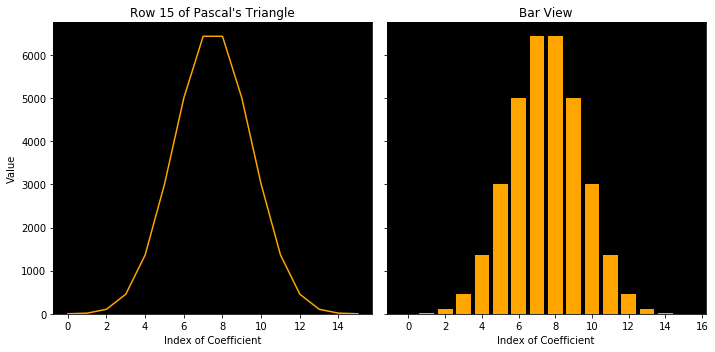

In [6]:
fig  = plt.figure(figsize=(10,5))
ax1   = plt.subplot('121')  # I will explain
rect = ax1.patch  # a Rectangle instance
rect.set_facecolor('black')

plt.title("Row {} of Pascal's Triangle".format(row))
ax1.set_xlabel('Index of Coefficient')
ax1.set_ylabel('Value')
plt.plot(data, color="orange")

ax2   = plt.subplot('122', sharey=ax1)  # I will explain
rect = ax2.patch  # a Rectangle instance
rect.set_facecolor('black')
plt.setp(ax2.get_yticklabels(), visible=False)

plt.title("Bar View".format(row))
ax2.set_xlabel('Index of Coefficient')
plt.bar(range(len(data)), data, color="orange");

fig.tight_layout()
plt.show();

## Standard Normal Distribution

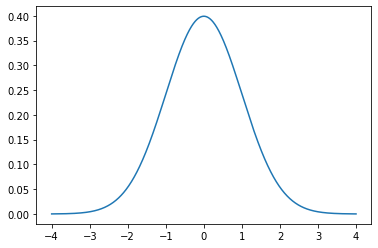

In [7]:
domain = np.linspace(-4,4,1000)  # 1000 equally spaced points between -4 and 4 inclusive
y = norm.pdf(domain, 0, 1)       # from scipy.stats
plt.plot(domain,y);              # total area under pdf == 1

## IQ Data

IQ data is often used to impart normal distribution concepts, because it's designed to have specific characteristics.  The standard deviation is defined to be 15 points, meaning every 15 points away from 100 represents one standard deviation, or a z-score of 1.0.

The z-score represents a score in terms of z-units or standard deviation units.  The probability of having a z-score of 3 or above, is the same as the probability as an IQ score of 100 + 15 + 15 + 15.  

Find the cummulative probability using the ```norm.cdf``` with the actual IQ score, given you already have a normal distribution with $\mu$ = 100 and $\sigma$ = 15.

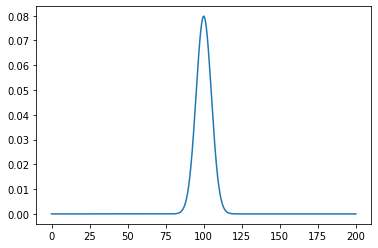

In [8]:
domain = np.linspace(0,200,1000)
y = norm.pdf(domain, 100, 5)
plt.plot(domain,y);

In [9]:
def z_score(x, mu, sigma, n=1):
    return (x - mu)/(sigma/math.sqrt(n))

z = z_score(115, 100, 5) # one standard deviation above mean
z

3.0

Lets create a standard normal distribution.  Now that we have the z-score, the probability of having an IQ of 115 or below is about 84%.

In [10]:
d = norm(0, 1) # standard normal distribution
d.cdf(z)

0.9986501019683699

In [11]:
d = norm(loc=100.0, scale=5.0) # back to the original bell curve
d.cdf(115)  # same answer as before

0.9986501019683699

The probability of having an IQ of 115 or above is simply 1 minus the previous result.

In [12]:
d = norm(loc=100.0, scale=15.0)
1 - d.cdf(115)

0.15865525393145707

In [13]:
z = z_score(93, 100, 15) # adjusted for sample size
z

-0.4666666666666667

In [14]:
d = norm(0, 1)
d.cdf(z)

0.32036919090127036

In [15]:
d = norm(100, 15)
d.cdf(93) # again, same answer

0.32036919090127036

In [16]:
z = z_score(115, 100, 15)
d = norm(0, 1)
d.cdf(z)

0.8413447460685429

In [17]:
z

1.0

In [18]:
d.ppf(0.8413447460685429)  # going backwards from cumulative population to z-score

1.0

# Three Sigma Rule

* Plus/minus 1 sigma from mean:  about 68.2% of a population
* Plus/minus 2 sigmas from mean: about 95.4% of a population
* Plus/minus 3 sigmas from mean: about 99.7% of a population

In [19]:
d = norm(100, 15)
d.cdf(100+15) - d.cdf(100-15)

0.6826894921370859

In [20]:
d = norm(100, 15)
d.cdf(100+2*15) - d.cdf(100-2*15)

0.9544997361036416

In [21]:
d = norm(100, 15)
d.cdf(100+3*15) - d.cdf(100-3*15)

0.9973002039367398

### Shading Areas Under the Curve

In [22]:
def draw_z_score(x, cond, mu, sigma, title):
    y = norm.pdf(x, mu, sigma)
    z = x[cond]
    plt.plot(x, y)
    plt.fill_between(z, 0, norm.pdf(z, mu, sigma))
    plt.title(title)
    plt.show()

In [23]:
d.cdf(115)-d.cdf(100-15)

0.6826894921370859

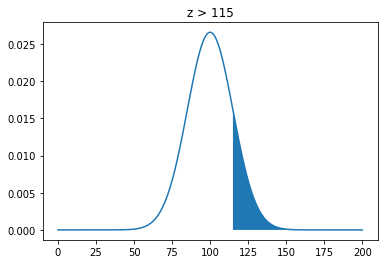

In [24]:
domain = np.arange(0, 200, 0.001)
draw_z_score(domain, domain>115, 100, 15, 'z > 115')

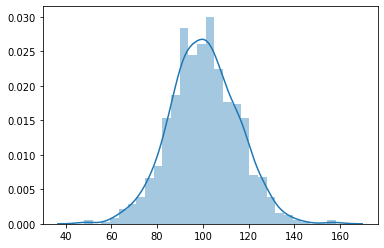

In [25]:
from numpy import random
sns.distplot(random.normal(loc=100, scale=15, size=1000), hist=True)
plt.show() 

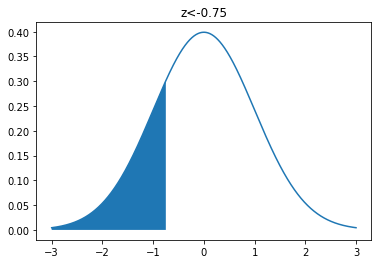

In [26]:
x = np.arange(-3,3,0.001)
z0 = -0.75
draw_z_score(x, x<z0, 0, 1, 'z<-0.75')

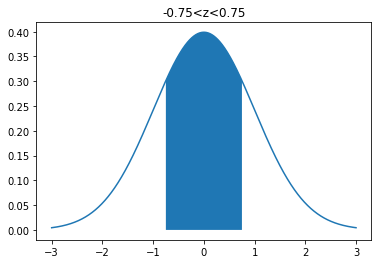

In [27]:
x = np.arange(-3,3,0.001)
z0 = 0.75
draw_z_score(x, (-z0 < x) & (x < z0), 0, 1, '-0.75<z<0.75')

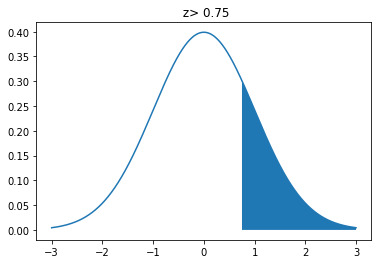

In [28]:
x = np.arange(-3,3,0.001)
z0 = 0.75
draw_z_score(x, x > z0, 0, 1, ' z> 0.75')

![overview](http://greenteapress.com/thinkstats2/html/thinkstats2026.png)

Figure 6.2: A framework that relates representations of distribution functions.

*Think Stats* by Allen B. Downing
ISBN-13: 978-1491907337
ISBN-10: 1491907339 

[Hypothesis Testing](http://greenteapress.com/thinkstats2/html/thinkstats2010.html#sec95)
*Ibid.*